In [7]:
from datascience import *
import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Bertrand Competition

Another model we consider is **Bertrand competition**, named for Joseph Louis Francois Bertrand, that is similar to Cournot competition but that firms compete using _prices_ rather than quantity. Under the assumptions of this model, consumers want to buy everything at the lowest price, and if the price is the same then demand is evenly split between those producers. One fundamental assumption is that all firms have the same unit cost of production, which means that as long as the price the firm sets is above the unit cost, it is willing to supply any amount that is demanded. 

An example of a Bertrand oligopoly comes form the soft drink industry: Coke and Pepsi (which form a **duopoly**, a market with only two participants). Both firms compete by changing their prices based on a function that takes into account the price charged by their competitor. This model predicts that even this small competition will result in prices being reduced to the marginal cost level, the same outcome as perfect competition.

## Bertrand Equilibrium

To find the Bertrand equilibrium, let $c$ be the (constant) marginal cost, $p_1$ be firm 1's price level, $p_2$ be firm 2's price level, and $p_m$ be the monopoly price level. Firm 1's price depends on what it believes firm 2 will set its prices to be. Because consumers always buy at the lowest price and the firm will fulfill any level of demand, pricing just below firm 2 will obtain full market demand for firm 1. Why might this not be a good idea? If firm 2 is pricing below the level of marginal cost, then firm 1 will incur losses because they would need to sell at a price lower than the cost of production. 

Let $p'_1(p_2)$ be firm 1's optimal price based on price $p_2$ set by firm 2. The graph below shows $p'_1(p_2)$. Note that when $p_2 < c$, $p'_1$ is equal to $c$, that $p'_1$ rises linearly along but _just below_ the line $p_1 = p_2$ with $p_2$ until $p_2$ reaches $p_m$ (the monopoly price level), and that it then levels off at $p_m$. In this way, firm 1's price stays below firm 2's price when it is not operating at a loss and does not exceed $p_m$ (because $p_m$ is the profit-maximizing amount for a monopoly and producing more actually results in less profit). This piecewise function has the formula

$$
p'_1(p_2) = \begin{cases}
c & \text{if } p_2 < c + h \\
p_2 - h & \text{if } c + h \le p_2 < p_m + h \\
p_m & \text{otherwise}
\end{cases}
$$

where $h$ is a small positive value and indicates the vertical distance between $p'_1$ and the line $p_1 = p_2$. We can think of $h$ as the amount by which firm 1 will undercut firm 2: as long as firm 1 will be operating at a profit and not exceeding $p_m$, they will sell at $h$ dollars below $p_2$.

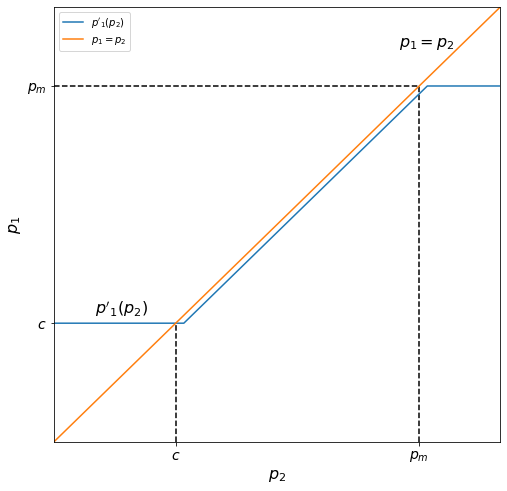

In [8]:
p_m = 18
c = 6
dist = 0.4 # the distance from p_1 = p_2 to p'_1(p_2)

xs1 = np.linspace(0, c, 100)
ys1 = c * np.ones_like(xs1)

xs2 = np.linspace(c + dist, p_m + dist, 100)
ys2 = xs2.copy() - dist

xs3 = np.linspace(p_m + dist, 25, 100)
ys3 = p_m * np.ones_like(xs3)

xs = np.append(np.append(xs1, xs2), xs3)
ys = np.append(np.append(ys1, ys2), ys3)

plt.figure(figsize=[8,8])

plt.plot(xs, ys, label=r"$p'_1(p_2)$")

y_equals_x_xs = np.linspace(0, 25, 100)
y_equals_x_ys = y_equals_x_xs.copy()

plt.plot(y_equals_x_xs, y_equals_x_ys, label=r"$p_1 = p_2$")

plt.vlines(c, 0, c, linestyle="dashed")
plt.vlines(p_m, 0, p_m, linestyle="dashed")
plt.hlines(p_m, 0, p_m, linestyle="dashed")

plt.text(2, 6.5, r"$p'_1(p_2)$", size=16)
plt.text(17, 20, r"$p_1 = p_2$", size=16)

plt.xlim([0,22])
plt.ylim([0,22])
plt.xlabel(r"$p_2$", size=16)
plt.ylabel(r"$p_1$", size=16)
plt.xticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.yticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.legend();

Because firm 2 has the same marginal cost $c$ as firm 1, its reaction function $p'_2(p_1)$ is symmetrical to firm 1's about the line $p_1 = p_2$:

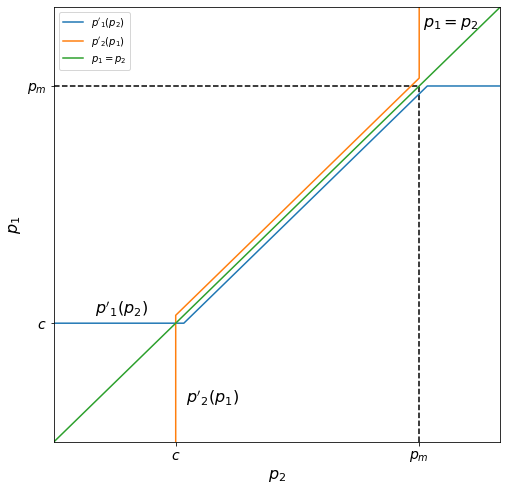

In [9]:
p_m = 18
c = 6
dist = 0.4 # the distance from p_1 = p_2 to p'_1(p_2)

xs1 = np.linspace(0, c, 100)
ys1 = c * np.ones_like(xs1)

xs2 = np.linspace(c + dist, p_m + dist, 100)
ys2 = xs2.copy() - dist

xs3 = np.linspace(p_m + dist, 25, 100)
ys3 = p_m * np.ones_like(xs3)

xs_1 = np.append(np.append(xs1, xs2), xs3)
ys_1 = np.append(np.append(ys1, ys2), ys3)

ys1 = np.linspace(0, c, 100)
xs1 = c * np.ones_like(xs1)

ys2 = np.linspace(c + dist, p_m + dist, 100)
xs2 = xs2.copy() - dist

ys3 = np.linspace(p_m + dist, 25, 100)
xs3 = p_m * np.ones_like(xs3)

xs_2 = np.append(np.append(xs1, xs2), xs3)
ys_2 = np.append(np.append(ys1, ys2), ys3)

plt.figure(figsize=[8,8])

plt.plot(xs_1, ys_1, label=r"$p'_1(p_2)$")
plt.plot(xs_2, ys_2, label=r"$p'_2(p_1)$")

y_equals_x_xs = np.linspace(0, 25, 100)
y_equals_x_ys = y_equals_x_xs.copy()

plt.plot(y_equals_x_xs, y_equals_x_ys, label=r"$p_1 = p_2$")

plt.vlines(p_m, 0, p_m, linestyle="dashed")
plt.hlines(p_m, 0, p_m, linestyle="dashed")

plt.text(2, 6.5, r"$p'_1(p_2)$", size=16)
plt.text(6.5, 2, r"$p'_2(p_1)$", size=16)
plt.text(18.2, 21, r"$p_1 = p_2$", size=16)

plt.xlim([0,22])
plt.ylim([0,22])
plt.xlabel(r"$p_2$", size=16)
plt.ylabel(r"$p_1$", size=16)
plt.xticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.yticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.legend();

These two strategies form a Nash equilibrium because neither firm can increase profits by changing their own strategy unilaterally. The equilibrium occurs where $p_1 = p'_1(p_2)$ and $p_2 = p'_2(p_1)$, at the intersection of the two reaction curves. Notably, this means that the Bertrand equilibrium occurs when both firms are producing _at marginal cost_. 

This makes intuitive sense: say that the two firms both set equal prices at a price above $c$ where they split demand equally. Then both firms have incentive to reduce their price slightly and take the other half of the market share from their competitor. Thus, both firms are tempted to lower prices as much as possible, but lowering below the level of marginal cost makes no sense because then they're operating at a loss. Thus, both firms sell at the price level $c$.

## Implications

The Bertrand model implies that even a duopoly in a market is enough to push prices down to the level of perfect competition. It does, however, rely on some serious assumptions. For example, there are many reasons why consumers might not buy the lowest-priced item (e.g. non-price competition, search costs). When these factors are included in the Bertrand model, the same result is no longer reached. It also ignores the fact that firms may not be able to supply the entire market demand; including these capacity constraints in the model can result in the system having no Nash equilibrium. Lastly, the Bertrand model demonstrates big incentives to cooperate and raise prices to the monopoly level; however, this state is not a Nash equilibrium, and in fact, the only Nash equilibrium of this model is the non-cooperative one with prices at marginal cost.

## Applying Bertrand

Now that we have derived the Bertrand equilibrium, let's apply it to a problem. Consider the Coke-Pepsi duopoly we mentioned above. Suppose that the only product in the soft-drink market is the 12-oz. can, that the market demand for cans is given by $P = -0.05 Q + 5.05$, and that the marginal cost for Coke and Pepsi is constant at $c = 0.25$. To find the equilibrium price for Coke based in it's belief that Pepsi will sell at $p_2 = 1$, we need to start by finding the monopoly price level $p_m$; recall from Cournot that this occurs when the marginal revenue curve of the market demand intersects the marginal cost. The marginal revenue is $r(q) = -0.1 q + 5.05$:

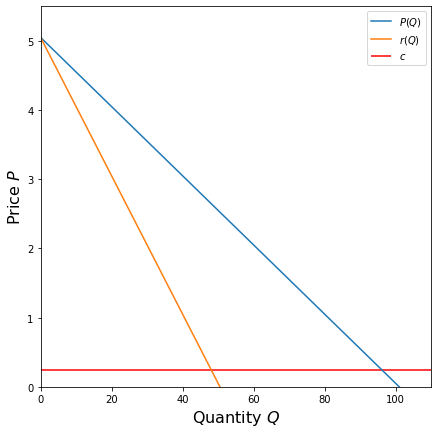

In [10]:
P_fn = lambda x: -0.05 * x + 5.05
r_fn = lambda x: 2 * P_fn(x) - P_fn(0)
Qs = np.linspace(-10, 1000, 1000)
Ps = P_fn(Qs)
rs = r_fn(Qs)

plt.figure(figsize=[7,7])
plt.plot(Qs, Ps, label=r"$P(Q)$")
plt.plot(Qs, rs, label=r"$r(Q)$")
plt.hlines(.25, -10, 150, color="r", label=r"$c$")
plt.xlim([0, 110])
plt.ylim([0, 5.5])
plt.xlabel(r"Quantity $Q$", size=16)
plt.ylabel(r"Price $P$", size=16)
plt.legend();

Using SymPy, we can find the quantity $q$ at which $r(q) = c$. This value, denoted $q_m$, is the monopoly quantity.

In [11]:
c = 0.25
q = sympy.Symbol("q")
r = -.1 * q + 5.05

q_m = solve(r, c)
q_m

48.0000000000000

The monopoly price $p_m$ is the price from the market demand curve that this level of output:

In [12]:
Q = sympy.Symbol("Q")
P = -.05 * Q + 5.05

p_m = P.subs(Q, q_m)
p_m

2.65000000000000

Now that we have found $p_m$, we can use this to construct Coke's reaction function $p'_1(p_2)$ to Pepsi's choice of price. Assuming Coke selects $h=0.1$ (that is, Coke will sell at \$0.10 below Pepsi as long as they operate at a profit), the formula for $p'_1$ is

$$
p'_1(p_2) = \begin{cases}
0.25 & \text{if } p_2 < 0.25 + 0.1 \\
p_2 - 0.1 & \text{if } 0.25 + 0.1 \le p_2 < 2.65 + 0.1 \\
2.65 & \text{otherwise}
\end{cases}
$$

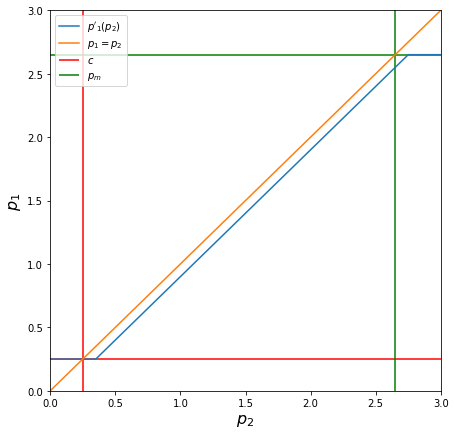

In [13]:
c = 0.25
def p1_fn(p_2, h):
    if p_2 < c + h:
        return c
    elif c + h <= p_2 < p_m + h:
        return p_2 - h
    else:
        return p_m

p1_fn = np.vectorize(p1_fn)

xs = np.linspace(-1, 4, 1000)
ys = xs.copy()
p1s =  p1_fn(xs, .1)

plt.figure(figsize=[7,7])
plt.plot(xs, p1s, label=r"$p'_1(p_2)$")
plt.plot(xs, ys, label=r"$p_1 = p_2$")
plt.hlines(c, 0, 5, color="r", label=r"$c$")
plt.vlines(c, 0, 5, color="r")
plt.hlines(p_m, 0, 5, color="g", label=r"$p_m$")
plt.vlines(p_m, 0, 5, color="g")
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel(r"$p_2$", size=16)
plt.ylabel(r"$p_1$", size=16)
plt.legend();

Finally, to find Coke's selling price, we find $p'_1(1)$, since Coke believes Pepsi will sell at \$1.

In [14]:
c = 0.25
h = 0.1
p_2 = sympy.Symbol("p_2")
p_1_prime = sympy.Piecewise(
    (c, p_2 < c + h),
    (p_2 - h, p_2 < p_m + h),
    (p_m, True)
)

p_1_prime.subs(p_2, 1)

0.900000000000000

Thus, if Coke believes that Pepsi will sell cans at \$1, it should sell at \$0.90. This should make intuitive sense: we showed that $p'_1(p_2)$ was below the line $p_1=p_2$ by a vertical distance of $h=0.1$, so it makes sense that Coke would sell at \$0.10 below Pepsi. If Coke had believed that Pepsi was going to sell at, say, \$2.70, then it would have been better for them to sell at the monopoly price level $p_m = 2.65$. If Pepsi was selling below margin cost, at \$0.20 maybe, then Coke's best bet would have been to sell at $c = 0.25$, although they would have sold 0 units of output because consumers buy from the lowest-priced vendor.